In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
path = '/content/Stock_data.csv'
df = pd.read_csv(path)
df.head()

,Gmt time,Volume,Open,High,Low,Close
0,12.12.2012 00:00:00.000,11011.3902,1.23492,1.235890,1.233830,1.235200
1,12.12.2012 04:00:00.000,13271.5599,1.23521,1.235510,1.233860,1.234340
2,12.12.2012 08:00:00.000,26716.2305,1.23435,1.236370,1.233305,1.234905
3,12.12.2012 12:00:00.000,28430.1602,1.23491,1.237285,1.234850,1.236810
4,12.12.2012 16:00:00.000,33124.1904,1.23680,1.238700,1.236285,1.238205


In [10]:
data = df.copy()
data


,Gmt time,Volume,Open,High,Low,Close
0,12.12.2012 00:00:00.000,11011.3902,1.234920,1.235890,1.233830,1.235200
1,12.12.2012 04:00:00.000,13271.5599,1.235210,1.235510,1.233860,1.234340
2,12.12.2012 08:00:00.000,26716.2305,1.234350,1.236370,1.233305,1.234905
3,12.12.2012 12:00:00.000,28430.1602,1.234910,1.237285,1.234850,1.236810
4,12.12.2012 16:00:00.000,33124.1904,1.236800,1.238700,1.236285,1.238205
...,...,...,...,...,...,...
12885,11.12.2020 04:00:00.000,19540.2200,1.607955,1.608915,1.604095,1.605455
12886,11.12.2020 08:00:00.000,48969.4700,1.605465,1.611820,1.605225,1.609935
12887,11.12.2020 12:00:00.000,49848.5000,1.609930,1.611365,1.606575,1.606745
12888,11.12.2020 16:00:00.000,23094.5300,1.606720,1.609540,1.605880,1.607315


1) Ask user for start date and end date

Between that period calculate: 12-period EMA and 26-period EMA (2 moving averages).

Plot these two MAs with Close price in a line chart

Enter the start date (YYYY/MM/DD): 2012/1/1
Enter the end date (YYYY/MM/DD): 2014/1/1


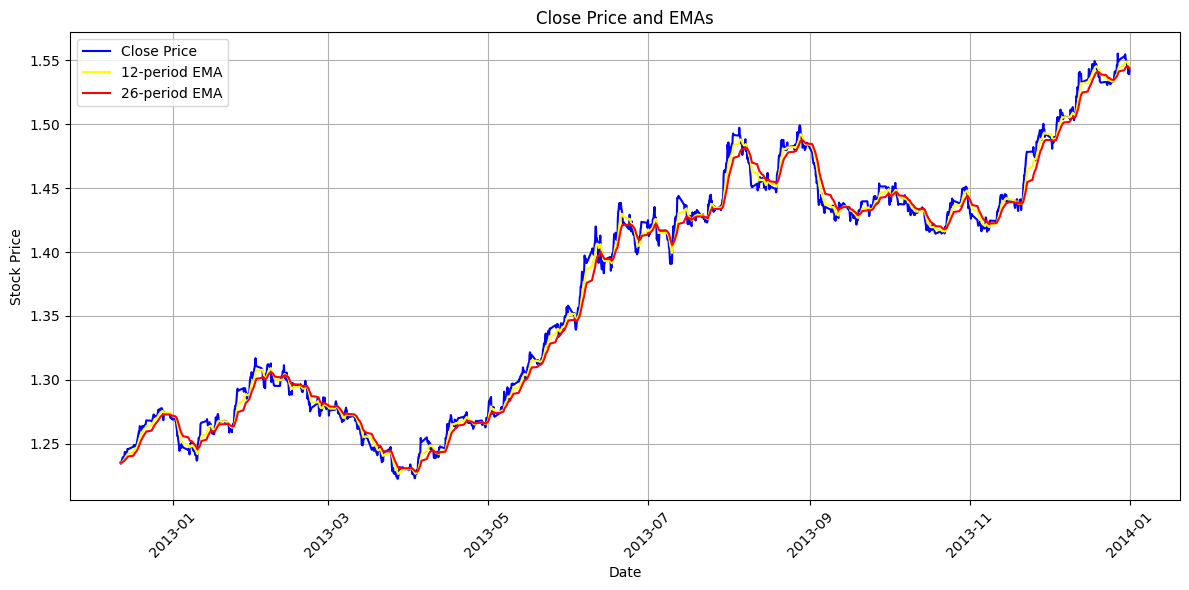

In [11]:
# 1)
# Convert the 'Gmt time' column to datetime format
data['Gmt time'] = pd.to_datetime(data['Gmt time'], format='%d.%m.%Y %H:%M:%S.%f')

start_date_input = input("Enter the start date (YYYY/MM/DD): ")
end_date_input = input("Enter the end date (YYYY/MM/DD): ")

start_date = pd.to_datetime(start_date_input, format='%Y/%m/%d')
end_date = pd.to_datetime(end_date_input, format='%Y/%m/%d')

# Filter data between user-input start and end dates
data1 = data[(data['Gmt time'] >= start_date) & (data['Gmt time'] <= end_date)].copy()

# Calculate the 12-period EMA and 26-period EMA
data1['12EMA'] = data1['Close'].ewm(span=12, adjust=False).mean()
data1['26EMA'] = data1['Close'].ewm(span=26, adjust=False).mean()

# Plot the Close price, 12-period EMA, and 26-period EMA
plt.figure(figsize=(12, 6))
plt.plot(data1['Gmt time'], data1['Close'], label='Close Price', color='blue')
plt.plot(data1['Gmt time'], data1['12EMA'], label='12-period EMA', color='yellow')
plt.plot(data1['Gmt time'], data1['26EMA'], label='26-period EMA', color='red')


plt.title('Close Price and EMAs')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

2) Ask user for start date and end date

 Between that period calculate: 12-period SMA and 26-period SMA

 Plot these two SMAs with Close price in a line chart

Enter the start date (YYYY/MM/DD): 2012/1/1
Enter the end date (YYYY/MM/DD): 2014/1/1


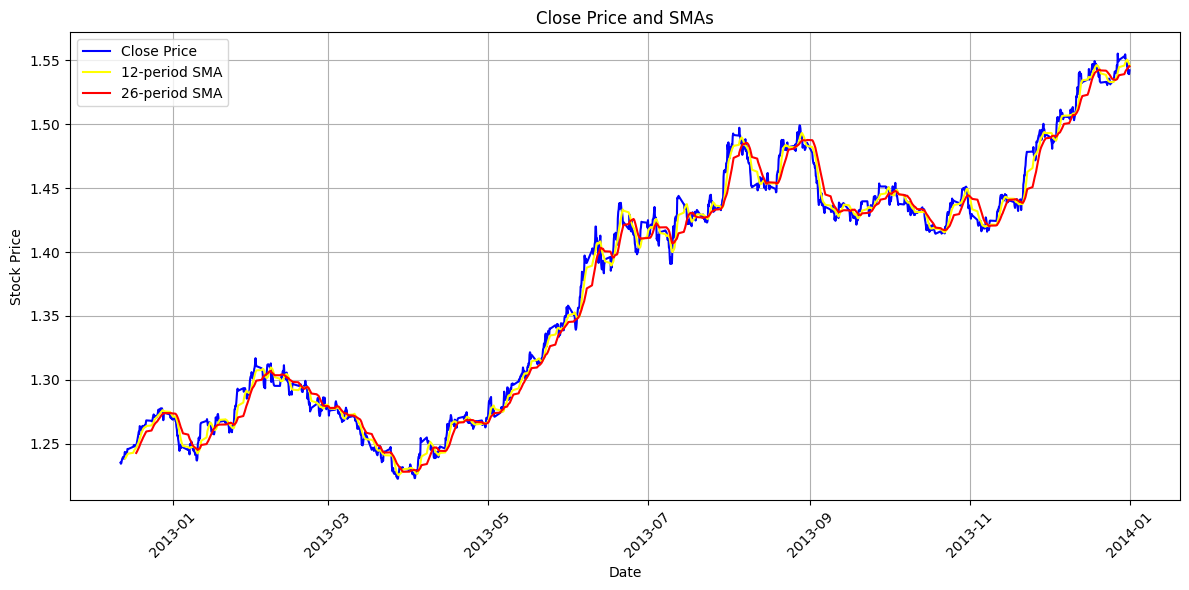

In [27]:
# 2)
start_date_input = input("Enter the start date (YYYY/MM/DD): ")
end_date_input = input("Enter the end date (YYYY/MM/DD): ")

# Convert user input to datetime format
start_date = pd.to_datetime(start_date_input, format='%Y/%m/%d')
end_date = pd.to_datetime(end_date_input, format='%Y/%m/%d')

# Filter data between user-input start and end dates
data2 = data[(data['Gmt time'] >= start_date) & (data['Gmt time'] <= end_date)].copy()

# Calculate the 12-period SMA and 26-period SMA
data2['12SMA'] = data2['Close'].rolling(12).mean()
data2['26SMA'] = data2['Close'].rolling(26).mean()

# Plot the Close price, 12-period SMA, and 26-period SMA
plt.figure(figsize=(12, 6))
plt.plot(data2['Gmt time'], data2['Close'], label='Close Price', color='blue')
plt.plot(data2['Gmt time'], data2['12SMA'], label='12-period SMA', color='yellow')
plt.plot(data2['Gmt time'], data2['26SMA'], label='26-period SMA', color='red')


plt.title('Close Price and SMAs')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

2 a) Compare SMA 12 EMA 12 and CLOSE


Enter the start date (YYYY/MM/DD): 2012/1/1
Enter the end date (YYYY/MM/DD): 2014/1/1


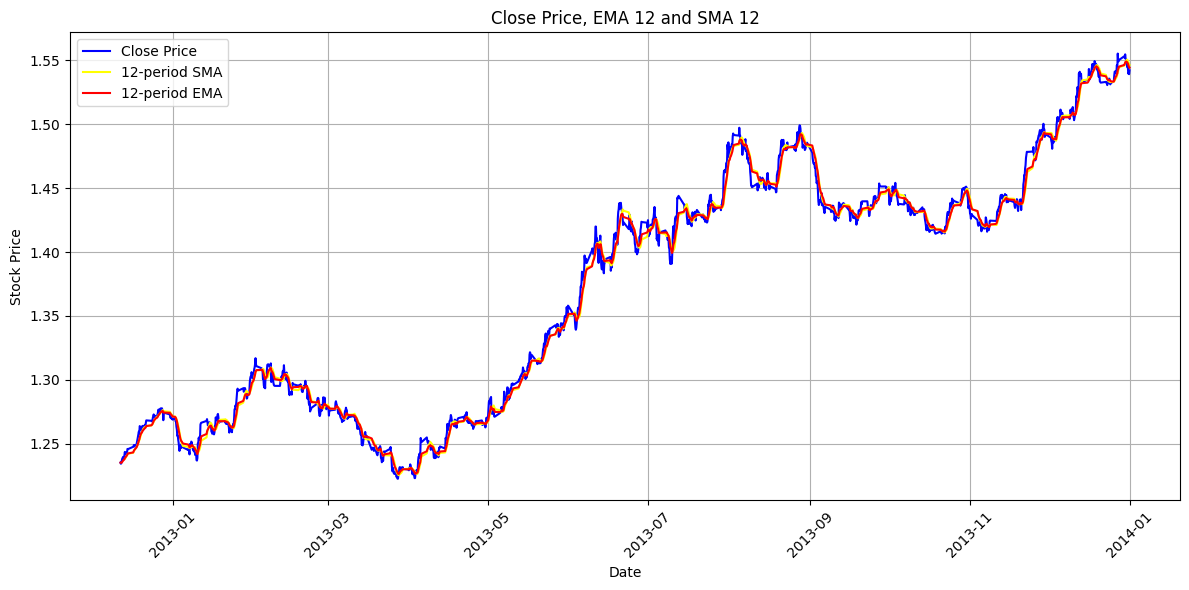

In [26]:
# 2 a) Compare SMA 12 EMA 12 and CLOSE

start_date_input = input("Enter the start date (YYYY/MM/DD): ")
end_date_input = input("Enter the end date (YYYY/MM/DD): ")

# Convert user input to datetime format
start_date = pd.to_datetime(start_date_input, format='%Y/%m/%d')
end_date = pd.to_datetime(end_date_input, format='%Y/%m/%d')

# Filter data between user-input start and end dates
data3 = data[(data['Gmt time'] >= start_date) & (data['Gmt time'] <= end_date)].copy()

# Calculate the 12-period SMA and 12-period EMA using .loc
data3['12SMA'] = data3['Close'].rolling(12).mean()
data3['12EMA'] = data3['Close'].ewm(span=12, adjust=False).mean()

# Plot the Close price, 12-period SMA, and 12-period EMA
plt.figure(figsize=(12, 6))
plt.plot(data3['Gmt time'], data3['Close'], label='Close Price', color='blue')
plt.plot(data3['Gmt time'], data3['12SMA'], label='12-period SMA', color='yellow')
plt.plot(data3['Gmt time'], data3['12EMA'], label='12-period EMA', color='red')


plt.title('Close Price, EMA 12 and SMA 12')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

2 b) Compare SMA 26 EMA 26 and CLOSE

Enter the start date (YYYY/MM/DD): 2012/1/1
Enter the end date (YYYY/MM/DD): 2014/1/1


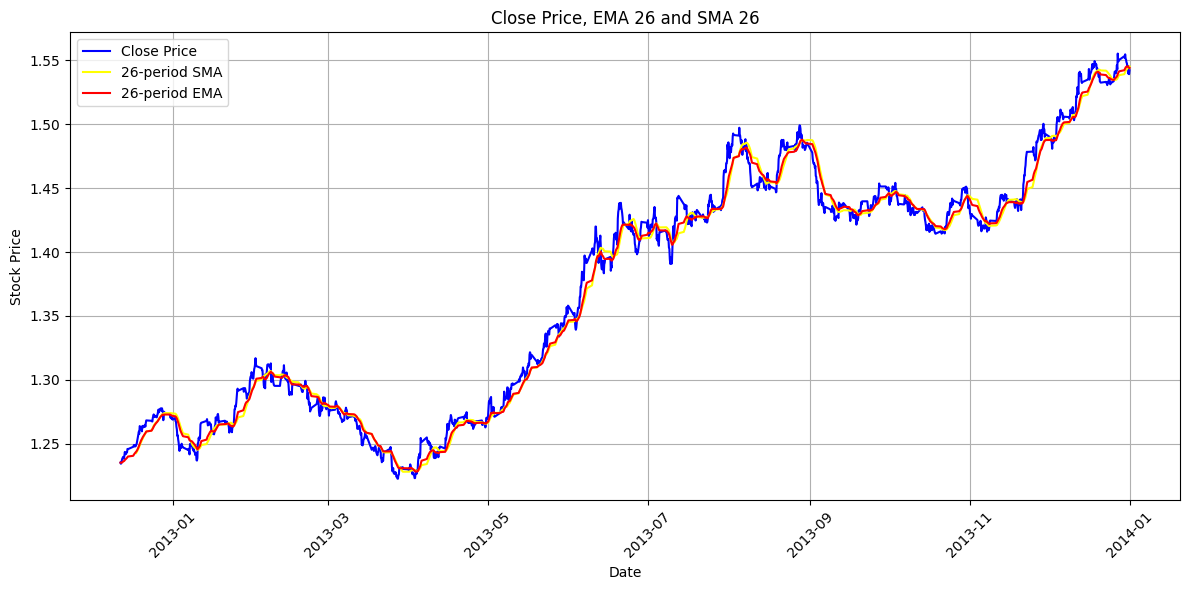

In [25]:
# 2 b) Compare SMA 26 EMA 26 and CLOSE

start_date_input = input("Enter the start date (YYYY/MM/DD): ")
end_date_input = input("Enter the end date (YYYY/MM/DD): ")

# Convert user input to datetime format
start_date = pd.to_datetime(start_date_input, format='%Y/%m/%d')
end_date = pd.to_datetime(end_date_input, format='%Y/%m/%d')

# Filter data between user-input start and end dates
data3 = data[(data['Gmt time'] >= start_date) & (data['Gmt time'] <= end_date)].copy()

# Calculate the 26-period SMA and 26-period EMA
data3['26SMA'] = data3['Close'].rolling(26).mean()
data3['26EMA'] = data3['Close'].ewm(span=26, adjust=False).mean()

# Plot the Close price, 26-period SMA, and 26-period EMA
plt.figure(figsize=(12, 6))
plt.plot(data3['Gmt time'], data3['Close'], label='Close Price', color='blue')
plt.plot(data3['Gmt time'], data3['26SMA'], label='26-period SMA', color='yellow')
plt.plot(data3['Gmt time'], data3['26EMA'], label='26-period EMA', color='red')


plt.title('Close Price, EMA 26 and SMA 26')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

3) Calculate MACD between EMA 26 and EMA 12

Plot line chart showing EMA 26 and EMA 12 and MACD

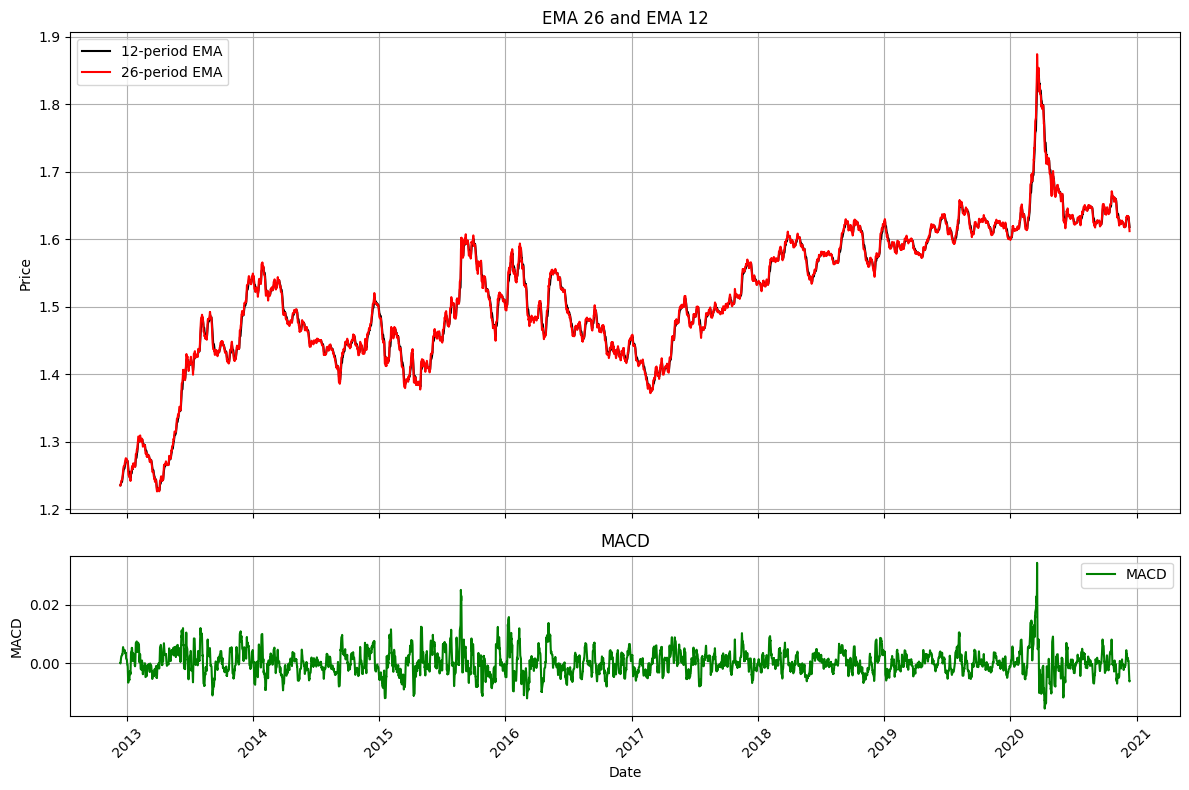

In [30]:
# 3) Calculate MACD between EMA 26 and EMA 12 Plot line chart showing EMA 26 and EMA 12 and MACD

# Calculate EMA 26 and EMA 12
data['26EMA'] = data['Close'].ewm(span=26, adjust=False).mean()
data['12EMA'] = data['Close'].ewm(span=12, adjust=False).mean()

# Calculate MACD
data['MACD'] = data['12EMA'] - data['26EMA']

# subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Plotting EMA 26 and EMA 12 on the first subplot (ax1)
sns.lineplot(x='Gmt time', y='26EMA', data=data, label='12-period EMA', color='black', ax=ax1)
sns.lineplot(x='Gmt time', y='12EMA', data=data, label='26-period EMA', color='red', ax=ax1)

ax1.set_ylabel('Price')
ax1.set_title('EMA 26 and EMA 12')
ax1.legend()
ax1.grid()

# Plot MACD on the second subplot (ax2)
sns.lineplot(x='Gmt time', y='MACD', data=data, label='MACD', color='green', ax=ax2)
ax2.set_xlabel('Date')
ax2.set_ylabel('MACD')
ax2.set_title('MACD')
ax2.legend()
ax2.grid()

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

1) SMA 12 vs close

Enter the start date (YYYY/MM/DD): 2012/1/1
Enter the end date (YYYY/MM/DD): 2014/1/1


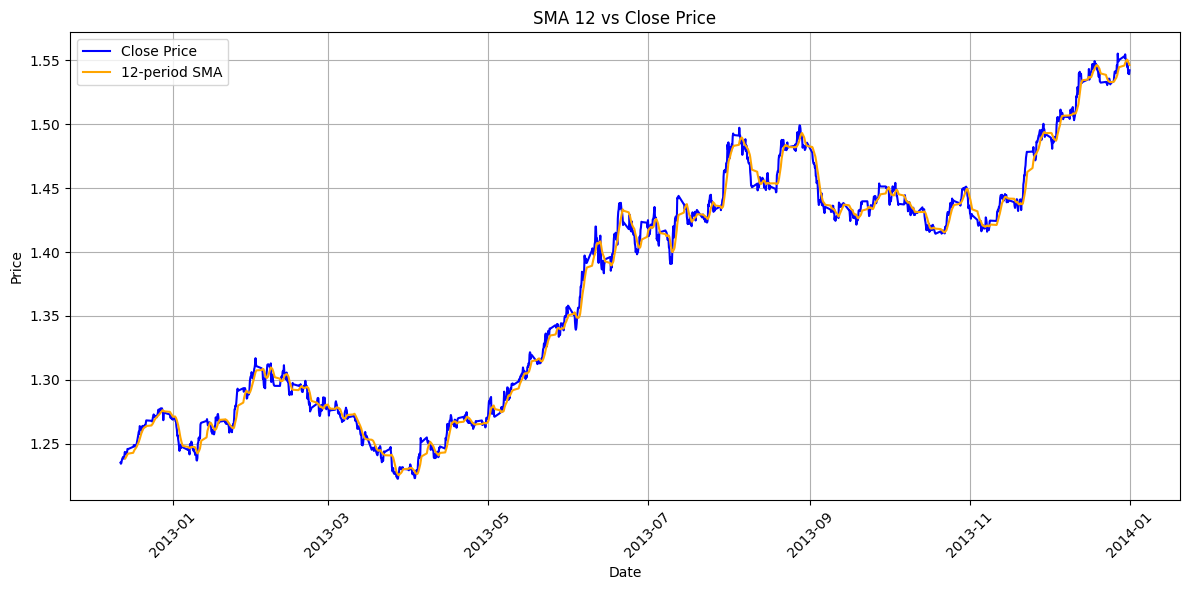

In [35]:
# 1) SMA 12 vs close

start_date_input = input("Enter the start date (YYYY/MM/DD): ")
end_date_input = input("Enter the end date (YYYY/MM/DD): ")

# Convert user input to datetime format
start_date = pd.to_datetime(start_date_input, format='%Y/%m/%d')
end_date = pd.to_datetime(end_date_input, format='%Y/%m/%d')

# Filter data between user-input start and end dates
data4 = data[(data['Gmt time'] >= start_date) & (data['Gmt time'] <= end_date)].copy()

# Calculate SMA 12
data4['SMA12'] = data4['Close'].rolling(12).mean()

plt.figure(figsize=(12, 6))
plt.plot(data4['Gmt time'], data4['Close'], label='Close Price', color='blue')
plt.plot(data4['Gmt time'], data4['SMA12'], label='12-period SMA', color='orange')

plt.title('SMA 12 vs Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()


2) SMA 26 vs close

Enter the start date (YYYY/MM/DD): 2012/1/1
Enter the end date (YYYY/MM/DD): 2014/1/1


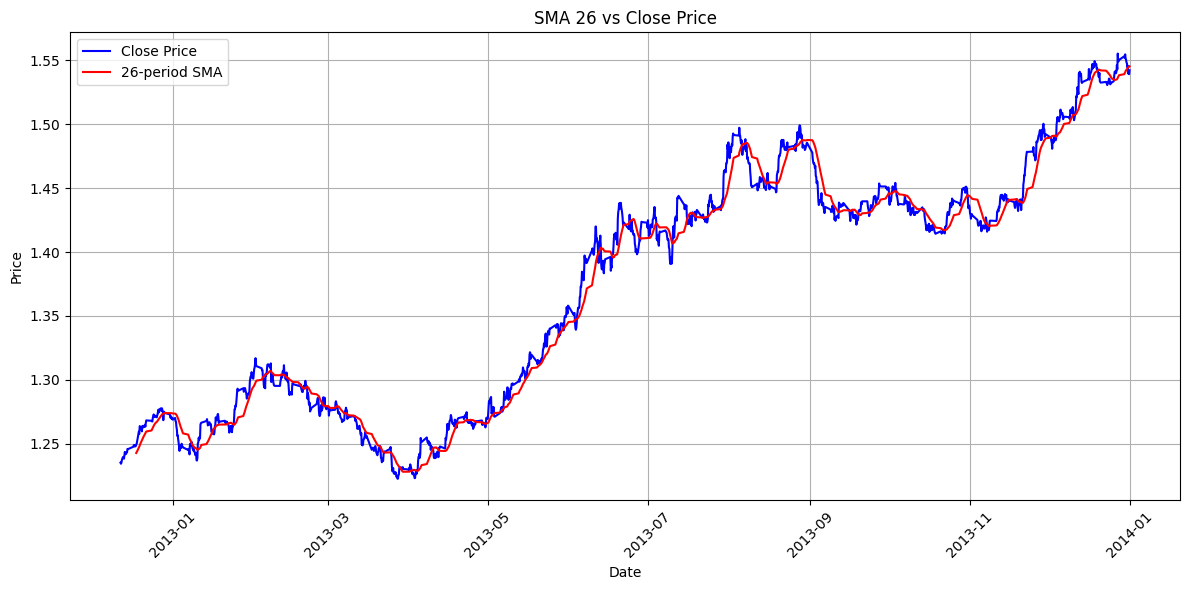

In [12]:
# 2) SMA 26 vs close

start_date_input = input("Enter the start date (YYYY/MM/DD): ")
end_date_input = input("Enter the end date (YYYY/MM/DD): ")

# Convert user input to datetime format
start_date = pd.to_datetime(start_date_input, format='%Y/%m/%d')
end_date = pd.to_datetime(end_date_input, format='%Y/%m/%d')

# Filter data between user-input start and end dates
data4 = data[(data['Gmt time'] >= start_date) & (data['Gmt time'] <= end_date)].copy()

# Calculate SMA 26
data4['SMA26'] = data4['Close'].rolling(26).mean()

plt.figure(figsize=(12, 6))
plt.plot(data4['Gmt time'], data4['Close'], label='Close Price', color='blue')
plt.plot(data4['Gmt time'], data4['SMA26'], label='26-period SMA', color='red')

plt.title('SMA 26 vs Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

3) EMA 12 vs close

Enter the start date (YYYY/MM/DD): 2012/1/1
Enter the end date (YYYY/MM/DD): 2014/1/1


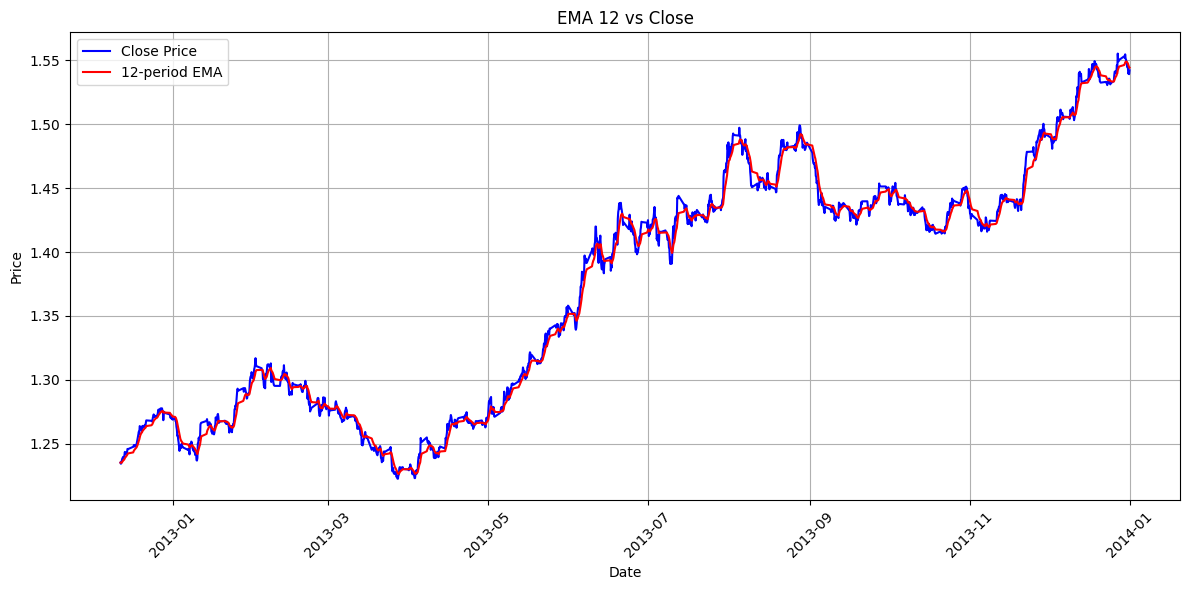

In [13]:
# 3) EMA 12 vs close

start_date_input = input("Enter the start date (YYYY/MM/DD): ")
end_date_input = input("Enter the end date (YYYY/MM/DD): ")

# Convert user input to datetime format
start_date = pd.to_datetime(start_date_input, format='%Y/%m/%d')
end_date = pd.to_datetime(end_date_input, format='%Y/%m/%d')

# Filter data between user-input start and end dates
data4 = data[(data['Gmt time'] >= start_date) & (data['Gmt time'] <= end_date)].copy()

# Calculate EMA 12
data4['EMA12'] = data4['Close'].ewm(span=12, adjust=False).mean()

plt.figure(figsize=(12, 6))
plt.plot(data4['Gmt time'], data4['Close'], label='Close Price', color='blue')
plt.plot(data4['Gmt time'], data4['EMA12'], label='12-period EMA', color='red')

plt.title('EMA 12 vs Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



4) EMA 26 vs close

Enter the start date (YYYY/MM/DD): 2012/1/1
Enter the end date (YYYY/MM/DD): 2014/1/1


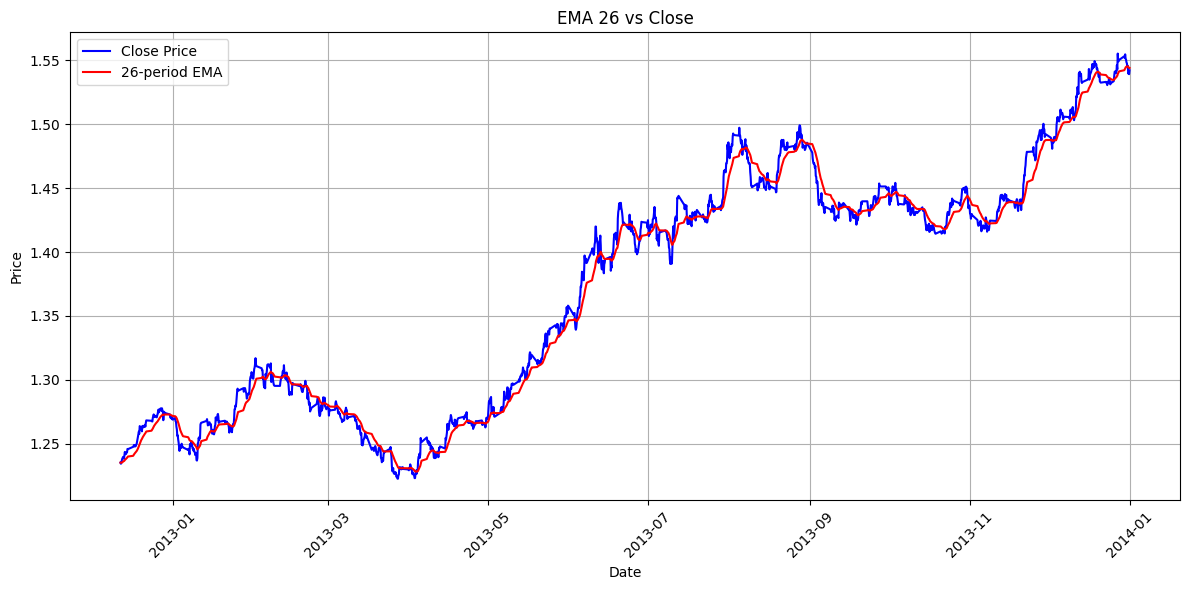

In [14]:
# 4) EMA 26 vs close

start_date_input = input("Enter the start date (YYYY/MM/DD): ")
end_date_input = input("Enter the end date (YYYY/MM/DD): ")

# Convert user input to datetime format
start_date = pd.to_datetime(start_date_input, format='%Y/%m/%d')
end_date = pd.to_datetime(end_date_input, format='%Y/%m/%d')

# Filter data between user-input start and end dates
data4 = data[(data['Gmt time'] >= start_date) & (data['Gmt time'] <= end_date)].copy()

# Calculate EMA 26
data4['EMA26'] = data4['Close'].ewm(span=26, adjust=False).mean()

plt.figure(figsize=(12, 6))
plt.plot(data4['Gmt time'], data4['Close'], label='Close Price', color='blue')
plt.plot(data4['Gmt time'], data4['EMA26'], label='26-period EMA', color='red')

plt.title('EMA 26 vs Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



5) MACD

Enter the start date (YYYY/MM/DD): 2012/1/1
Enter the end date (YYYY/MM/DD): 2014/1/1


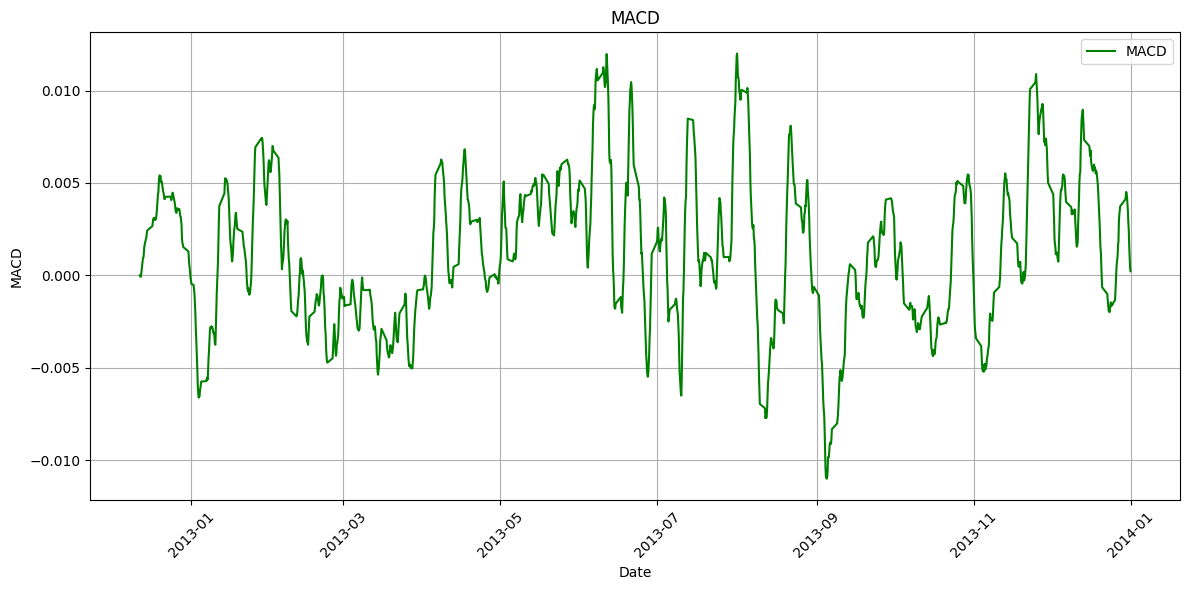

In [16]:
# 5) MACD

start_date_input = input("Enter the start date (YYYY/MM/DD): ")
end_date_input = input("Enter the end date (YYYY/MM/DD): ")

# Convert user input to datetime format
start_date = pd.to_datetime(start_date_input, format='%Y/%m/%d')
end_date = pd.to_datetime(end_date_input, format='%Y/%m/%d')

# Filter data between user-input start and end dates
data4 = data[(data['Gmt time'] >= start_date) & (data['Gmt time'] <= end_date)].copy()

# Calculate EMA 12 and EMA 26
data4['EMA12'] = data4['Close'].ewm(span=12, adjust=False).mean()
data4['EMA26'] = data4['Close'].ewm(span=26, adjust=False).mean()

# Calculate MACD (the difference between EMA12 and EMA26)
data4['MACD'] = data4['EMA12'] - data4['EMA26']

plt.figure(figsize=(12, 6))
plt.plot(data4['Gmt time'], data4['MACD'], label='MACD', color='green')

plt.title('MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


6) RSI 12 vs Close

Enter the start date (YYYY/MM/DD): 2013/1/1
Enter the end date (YYYY/MM/DD): 2015/1/1


<ipython-input-22-bb193f1f7008>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['Gain'].iloc[i] = data4['Daily Return'].iloc[i]
<ipython-input-22-bb193f1f7008>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['Loss'].iloc[i] = abs(data4['Daily Return'].iloc[i])


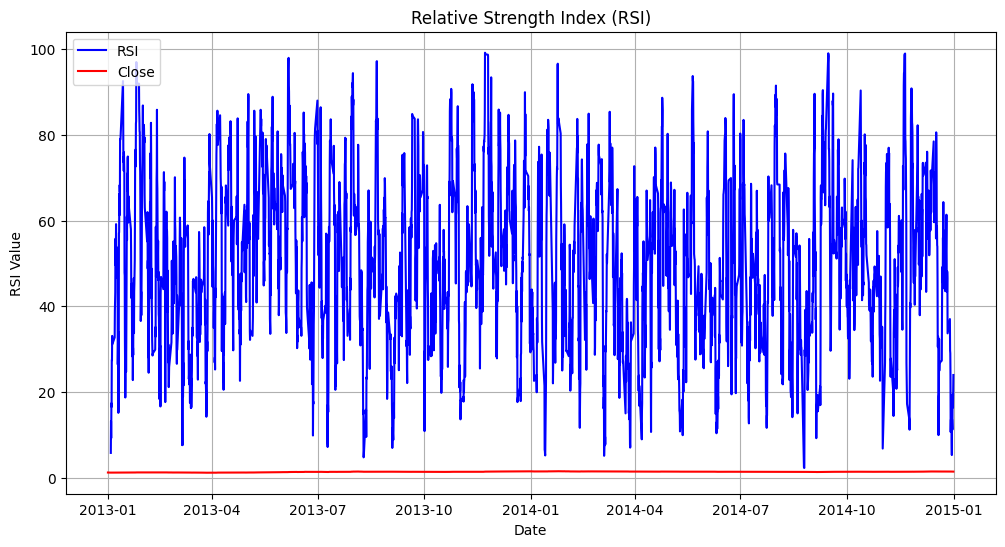

In [22]:
# 6) RSI 12 VS Close

start_date_input = input("Enter the start date (YYYY/MM/DD): ")
end_date_input = input("Enter the end date (YYYY/MM/DD): ")

# Convert user input to datetime format
start_date = pd.to_datetime(start_date_input, format='%Y/%m/%d')
end_date = pd.to_datetime(end_date_input, format='%Y/%m/%d')

# Filter data between user-input start and end dates
data4 = data[(data['Gmt time'] >= start_date) & (data['Gmt time'] <= end_date)].copy()

# Calculate daily returns
data4['Daily Return'] = data4['Close'].diff()

# Calculate average gain and average loss over the specified period
data4['Gain'] = 0
data4['Loss'] = 0

for i in range(1, len(data4)):
    if data4['Daily Return'].iloc[i] > 0:
        data4['Gain'].iloc[i] = data4['Daily Return'].iloc[i]
    else:
        data4['Loss'].iloc[i] = abs(data4['Daily Return'].iloc[i])

avg_gain = data4['Gain'].rolling(12).mean()
avg_loss = data4['Loss'].rolling(12).mean()

# Calculate RS (relative strength) and RSI values
rs = avg_gain / avg_loss
data4['RSI'] = 100 - (100 / (1 + rs))

# Plot RSI
plt.figure(figsize=(12, 6))
plt.plot(data4['Gmt time'], data4['RSI'], label='RSI', color='blue')
plt.plot(data4['Gmt time'], data4['Close'], label='Close', color = 'red')
plt.title('Relative Strength Index (RSI) 12 period')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.grid(True)
plt.show()

7) RSI 26 vs Close

Enter the start date (YYYY/MM/DD): 2013/1/1
Enter the end date (YYYY/MM/DD): 2015/1/1


<ipython-input-23-e0a658e1324d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['Gain'].iloc[i] = data4['Daily Return'].iloc[i]
<ipython-input-23-e0a658e1324d>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['Loss'].iloc[i] = abs(data4['Daily Return'].iloc[i])


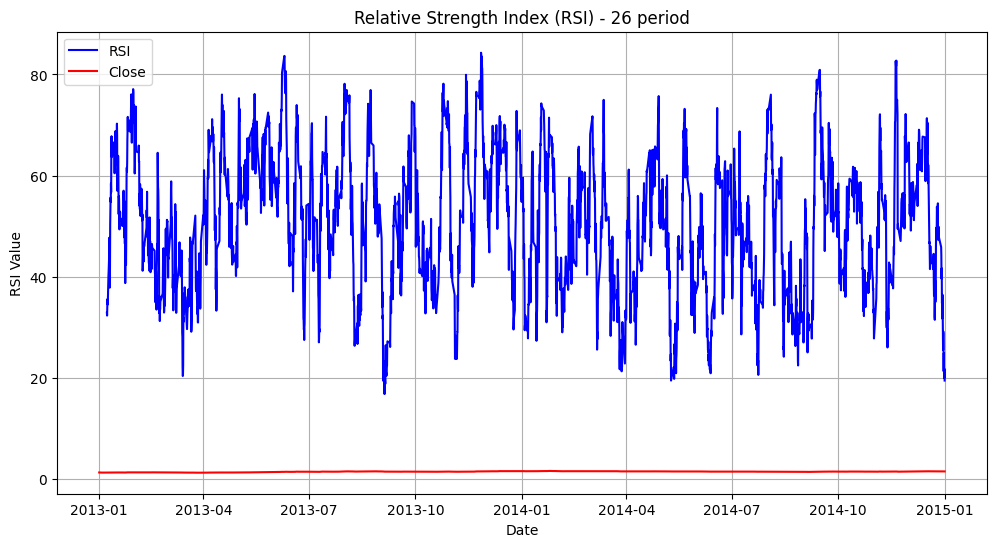

In [23]:
# 6) RSI 26 VS Close

start_date_input = input("Enter the start date (YYYY/MM/DD): ")
end_date_input = input("Enter the end date (YYYY/MM/DD): ")

# Convert user input to datetime format
start_date = pd.to_datetime(start_date_input, format='%Y/%m/%d')
end_date = pd.to_datetime(end_date_input, format='%Y/%m/%d')

# Filter data between user-input start and end dates
data4 = data[(data['Gmt time'] >= start_date) & (data['Gmt time'] <= end_date)].copy()

# Calculate daily returns
data4['Daily Return'] = data4['Close'].diff()

# Calculate average gain and average loss over the specified period
data4['Gain'] = 0
data4['Loss'] = 0

for i in range(1, len(data4)):
    if data4['Daily Return'].iloc[i] > 0:
        data4['Gain'].iloc[i] = data4['Daily Return'].iloc[i]
    else:
        data4['Loss'].iloc[i] = abs(data4['Daily Return'].iloc[i])

avg_gain = data4['Gain'].rolling(26).mean()
avg_loss = data4['Loss'].rolling(26).mean()

# Calculate RS (relative strength) and RSI values
rs = avg_gain / avg_loss
data4['RSI'] = 100 - (100 / (1 + rs))

# Plot RSI
plt.figure(figsize=(12, 6))
plt.plot(data4['Gmt time'], data4['RSI'], label='RSI', color='blue')
plt.plot(data4['Gmt time'], data4['Close'], label='Close', color = 'red')
plt.title('Relative Strength Index (RSI) - 26 period')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.grid(True)
plt.show()

8) Bollinger Bands

Enter the start date (YYYY/MM/DD): 2013/1/1
Enter the end date (YYYY/MM/DD): 2013/12/1


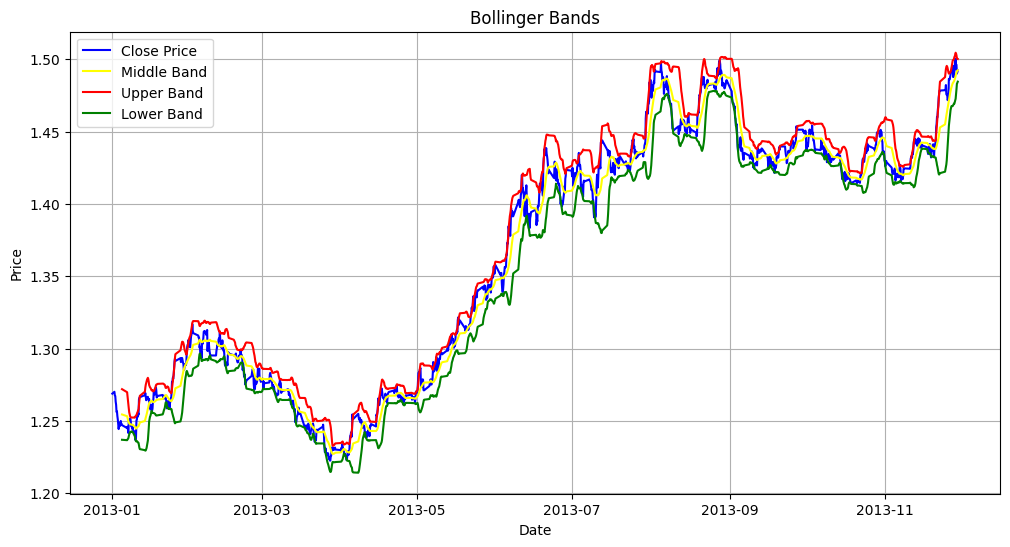

In [32]:
#Bollinger Bands

start_date_input = input("Enter the start date (YYYY/MM/DD): ")
end_date_input = input("Enter the end date (YYYY/MM/DD): ")

# Convert user input to datetime format
start_date = pd.to_datetime(start_date_input, format='%Y/%m/%d')
end_date = pd.to_datetime(end_date_input, format='%Y/%m/%d')

# Filter data between user-input start and end dates
data5 = data[(data['Gmt time'] >= start_date) & (data['Gmt time'] <= end_date)].copy()

# Define the parameters for Bollinger Bands
window = 20  # Window for calculating the moving average and standard deviation
num_std_dev = 2  # Number of standard deviations for the bands

# Calculate the rolling mean (middle band)
data5['Middle Band'] = data5['Close'].rolling(window=window).mean()

# Calculate the rolling standard deviation
data5['Std Dev'] = data5['Close'].rolling(window=window).std()

# Calculate the upper and lower Bollinger Bands
data5['Upper Band'] = data5['Middle Band'] + (data5['Std Dev'] * num_std_dev)
data5['Lower Band'] = data5['Middle Band'] - (data5['Std Dev'] * num_std_dev)

plt.figure(figsize=(12, 6))
plt.plot(data5['Gmt time'], data5['Close'], label='Close Price', color='blue')
plt.plot(data5['Gmt time'], data5['Middle Band'], label='Middle Band', color='yellow')
plt.plot(data5['Gmt time'], data5['Upper Band'], label='Upper Band', color='red')
plt.plot(data5['Gmt time'], data5['Lower Band'], label='Lower Band', color='green')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [50]:
pip install pandas_ta

In [51]:
import pandas_ta as talib

9) ADX

Enter the start date (YYYY/MM/DD): 2013/1/1
Enter the end date (YYYY/MM/DD): 2015/1/1


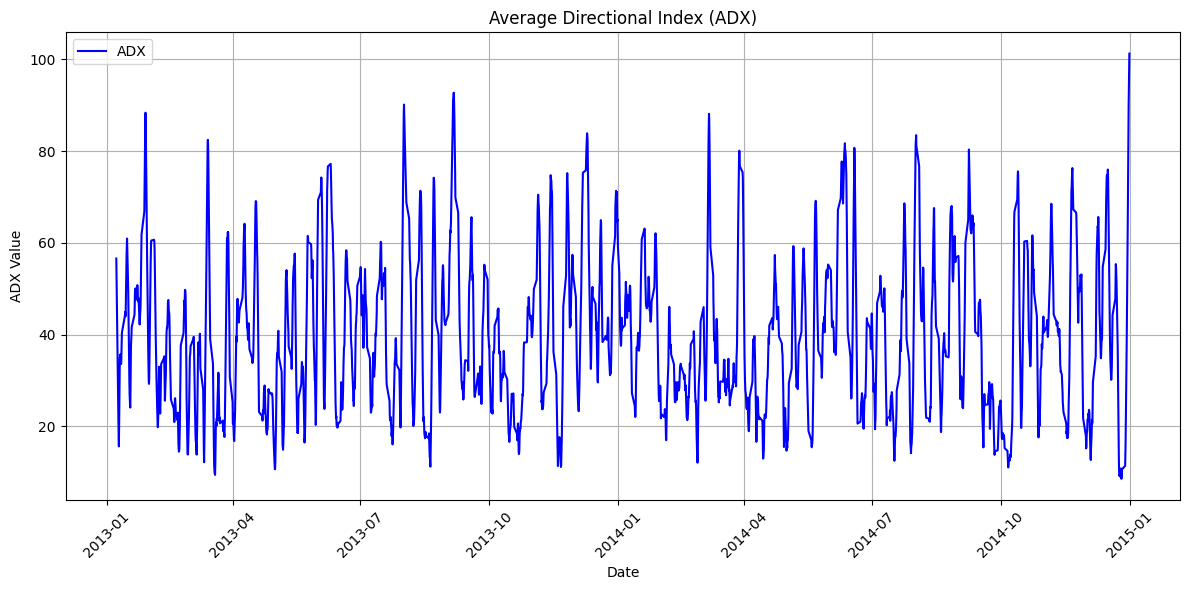

In [56]:
# 9) ADX

start_date_input = input("Enter the start date (YYYY/MM/DD): ")
end_date_input = input("Enter the end date (YYYY/MM/DD): ")

# Convert user input to datetime format
start_date = pd.to_datetime(start_date_input, format='%Y/%m/%d')
end_date = pd.to_datetime(end_date_input, format='%Y/%m/%d')

# Filter data between user-input start and end dates
data6 = data[(data['Gmt time'] >= start_date) & (data['Gmt time'] <= end_date)].copy()

# Calculate True Range (TR) for each period
data6['High-Low'] = data6['High'] - data6['Low']
data6['High-PrevClose'] = abs(data6['High'] - data6['Close'].shift(1))
data6['Low-PrevClose'] = abs(data6['Low'] - data6['Close'].shift(1))
data6['TR'] = data6[['High-Low', 'High-PrevClose', 'Low-PrevClose']].max(axis=1)

# Calculate +DM and -DM for each period
data6['+DM'] = (data6['High'] - data6['High'].shift(1)).where((data6['High'] - data6['High'].shift(1)) > (data6['Low'].shift(1) - data6['Low']), 0)
data6['-DM'] = (data6['Low'].shift(1) - data6['Low']).where((data6['Low'].shift(1) - data6['Low']) > (data6['High'] - data6['High'].shift(1)), 0)

# Calculate 14-day ATR
ATR14 = data6['TR'].rolling(window=14).mean()

# Calculate 14-day +DM14 and -DM14
plus_DM14 = data6['+DM'].rolling(window=14).mean()
minus_DM14 = data6['-DM'].rolling(window=14).mean()

# Calculate +DI14 and -DI14
plus_DI14 = (plus_DM14 / ATR14) * 100
minus_DI14 = (minus_DM14 / ATR14) * 100

# Calculate Directional Movement Index (DX)
DX = (abs(plus_DI14 - minus_DI14) / abs(plus_DI14 + minus_DI14)) * 100

# Calculate 14-day ADX
data6['ADX'] = DX.rolling(window=14).mean()

# Plot the ADX values
plt.figure(figsize=(12, 6))
plt.plot(data6['Gmt time'], data6['ADX'], label='ADX', color='b')
plt.title('Average Directional Index (ADX)')
plt.xlabel('Date')
plt.ylabel('ADX Value')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


10) Close vs High vs Low

Enter the start date (YYYY/MM/DD): 2014/1/1
Enter the end date (YYYY/MM/DD): 2014/10/1


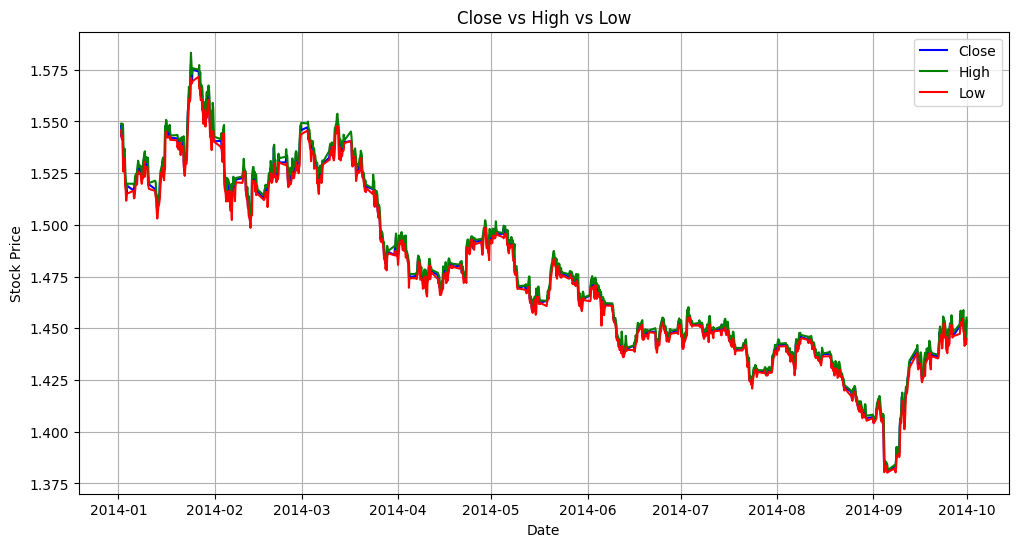

In [57]:
# 10) Close vs High vs Low

start_date_input = input("Enter the start date (YYYY/MM/DD): ")
end_date_input = input("Enter the end date (YYYY/MM/DD): ")

# Convert user input to datetime format
start_date = pd.to_datetime(start_date_input, format='%Y/%m/%d')
end_date = pd.to_datetime(end_date_input, format='%Y/%m/%d')

# Filter data between user-input start and end dates
data6 = data[(data['Gmt time'] >= start_date) & (data['Gmt time'] <= end_date)].copy()

plt.figure(figsize=(12, 6))
plt.plot(data6['Gmt time'], data6['Close'], label='Close', color='blue')
plt.plot(data6['Gmt time'], data6['High'], label='High', color='green')
plt.plot(data6['Gmt time'], data6['Low'], label='Low', color='red')

plt.title('Close vs High vs Low')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)

plt.show()
